In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
os.chdir('/Users/andreasabia/Documents/ESCP/Consumer Insight & Analytics/Predictive Analytics/')
data = pd.read_csv('kkbox.csv')
data=data.loc[:,'is_churn':]

## Task 1
### Run a regression with "is_churn" as a dependent variable
##### Q1. Which type of regression would you pick?
Logistic Regression, Logit Transformation
##### Q2. Which variables influence the probability of churn?
The variables which have significant P-values, hence having an influence on the probability of churning, are: 
<br>- is_duplicate;
<br>- age;
<br>- registered_via;
<br>- is_auto_renew;
<br>- is_cancel;
<br>- payment_method_id.
##### Q3. How can we interpret the output?
The significant variables tell us the following:
<br>1) the older you are, the higher the chances of churn; 
<br>2) the means through which one registers and the payment method influence the probability of churn; 
<br>3) if you have an auto renewal of your subscription, you are less likely to churn; 
<br>4) the longer you have been with the subscription, the less likely you are to churn; 
<br>5) if a user has cancelled a subscription, then they are more likely to churn.

In [3]:
# Selecting data
target=data['is_churn']
t1_data= data.drop('is_churn', axis=1)

In [4]:
# Scaling the data
x=t1_data.copy()
scaler=StandardScaler()
scaler.fit(x)
y=scaler.transform(x)
t1_data = pd.DataFrame(y, columns = t1_data.columns)

In [5]:
# exploring Logit transformation
t1_data=sm.add_constant(t1_data)
Logit_model=sm.Logit(target,t1_data)
result=Logit_model.fit()
print(result.summary2())

         Current function value: 0.170820
         Iterations: 35
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.434    
Dependent Variable:         is_churn                AIC:                     3444.3966
Date:                       2020-05-11 12:18        BIC:                     3545.3413
No. Observations:           10000                   Log-Likelihood:          -1708.2  
Df Model:                   13                      LL-Null:                 -3016.1  
Df Residuals:               9986                    LLR p-value:             0.0000   
Converged:                  0.0000                  Scale:                   1.0000   
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                        Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-------------

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
# Exploring marginal effects
marginal_effects=result.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:               is_churn
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
is_duplicate              -0.0498      0.001    -35.788      0.000      -0.053      -0.047
city                       0.0001      0.002      0.063      0.950      -0.004       0.004
age                        0.0025      0.001      1.999      0.046    4.84e-05       0.005
gender                  3.176e-05      0.002      0.014      0.989      -0.004       0.004
registered_via            -0.0058      0.002     -2.324      0.020      -0.011      -0.001
registration_init_time    -0.0021      0.003     -0.709      0.479      -0.008       0.004
payment_method_id          0.0044      0.002      1.830      0.067      -0.000       0.009
payment_plan_days         -0.

In [6]:
# Exploring P-values for significance
result.pvalues<0.07

const                      True
is_duplicate               True
city                      False
age                        True
gender                    False
registered_via             True
registration_init_time    False
payment_method_id          True
payment_plan_days         False
plan_list_price           False
actual_amount_paid        False
is_auto_renew              True
is_cancel                  True
n_transactions            False
payment_price_diff        False
dtype: bool

In [16]:
# create inputs for pipeline
X= data.drop('is_churn', axis=1)
y=data['is_churn']
scaler= StandardScaler()
lr= LogisticRegression()
dt= DecisionTreeClassifier(max_depth=3)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=69,stratify=y)

In [17]:
#pipeline for Logistic Regression
pipeline=make_pipeline(scaler,lr)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print("Accuracy: ","{0:.2%}".format(pipeline.score(X_test,y_test)))
print('////////////////////////////////////////////////')
print('Confusion Matrix')
print(confusion_matrix(y_pred,y_test))
print('////////////////////////////////////////////////')
print(classification_report(y_pred,y_test))

Accuracy:  92.68%
////////////////////////////////////////////////
Confusion Matrix
[[2189   96]
 [  87  128]]
////////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2285
           1       0.57      0.60      0.58       215

    accuracy                           0.93      2500
   macro avg       0.77      0.78      0.77      2500
weighted avg       0.93      0.93      0.93      2500



## Task 2
### Decision Trees
##### Which variables drive churn probability according to the trees?
The variables which drive churn are similar to the ones identified by the Logistic Regression above:
<br>1) is_duplicate
<br>2) is_cancel
<br>3) is_auto_renew
<br>4) plan_list_price
<br>5) n_transactions

In [18]:
#pipeline for Decision Tree
pipeline=make_pipeline(scaler,dt)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print("Accuracy: ", "{0:.2%}".format(pipeline.score(X_test,y_test)))
print('////////////////////////////////////////////////')
print('Confusion Matrix')
print(confusion_matrix(y_pred,y_test))
print('////////////////////////////////////////////////')
print(classification_report(y_pred,y_test))

Accuracy:  92.84%
////////////////////////////////////////////////
Confusion Matrix
[[2151   54]
 [ 125  170]]
////////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2205
           1       0.76      0.58      0.66       295

    accuracy                           0.93      2500
   macro avg       0.85      0.78      0.81      2500
weighted avg       0.92      0.93      0.92      2500



In [19]:
mydict=(dict(zip(X.columns, dt.feature_importances_)))
mydict = {key:val for key, val in mydict.items() if val > 0}

<BarContainer object of 5 artists>

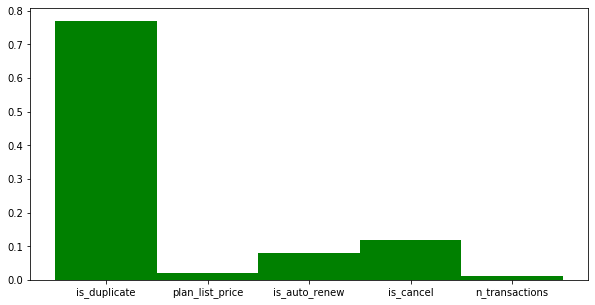

In [20]:
plt.figure(figsize=(10,5))
plt.bar(mydict.keys(), mydict.values(), width=1, color='g')

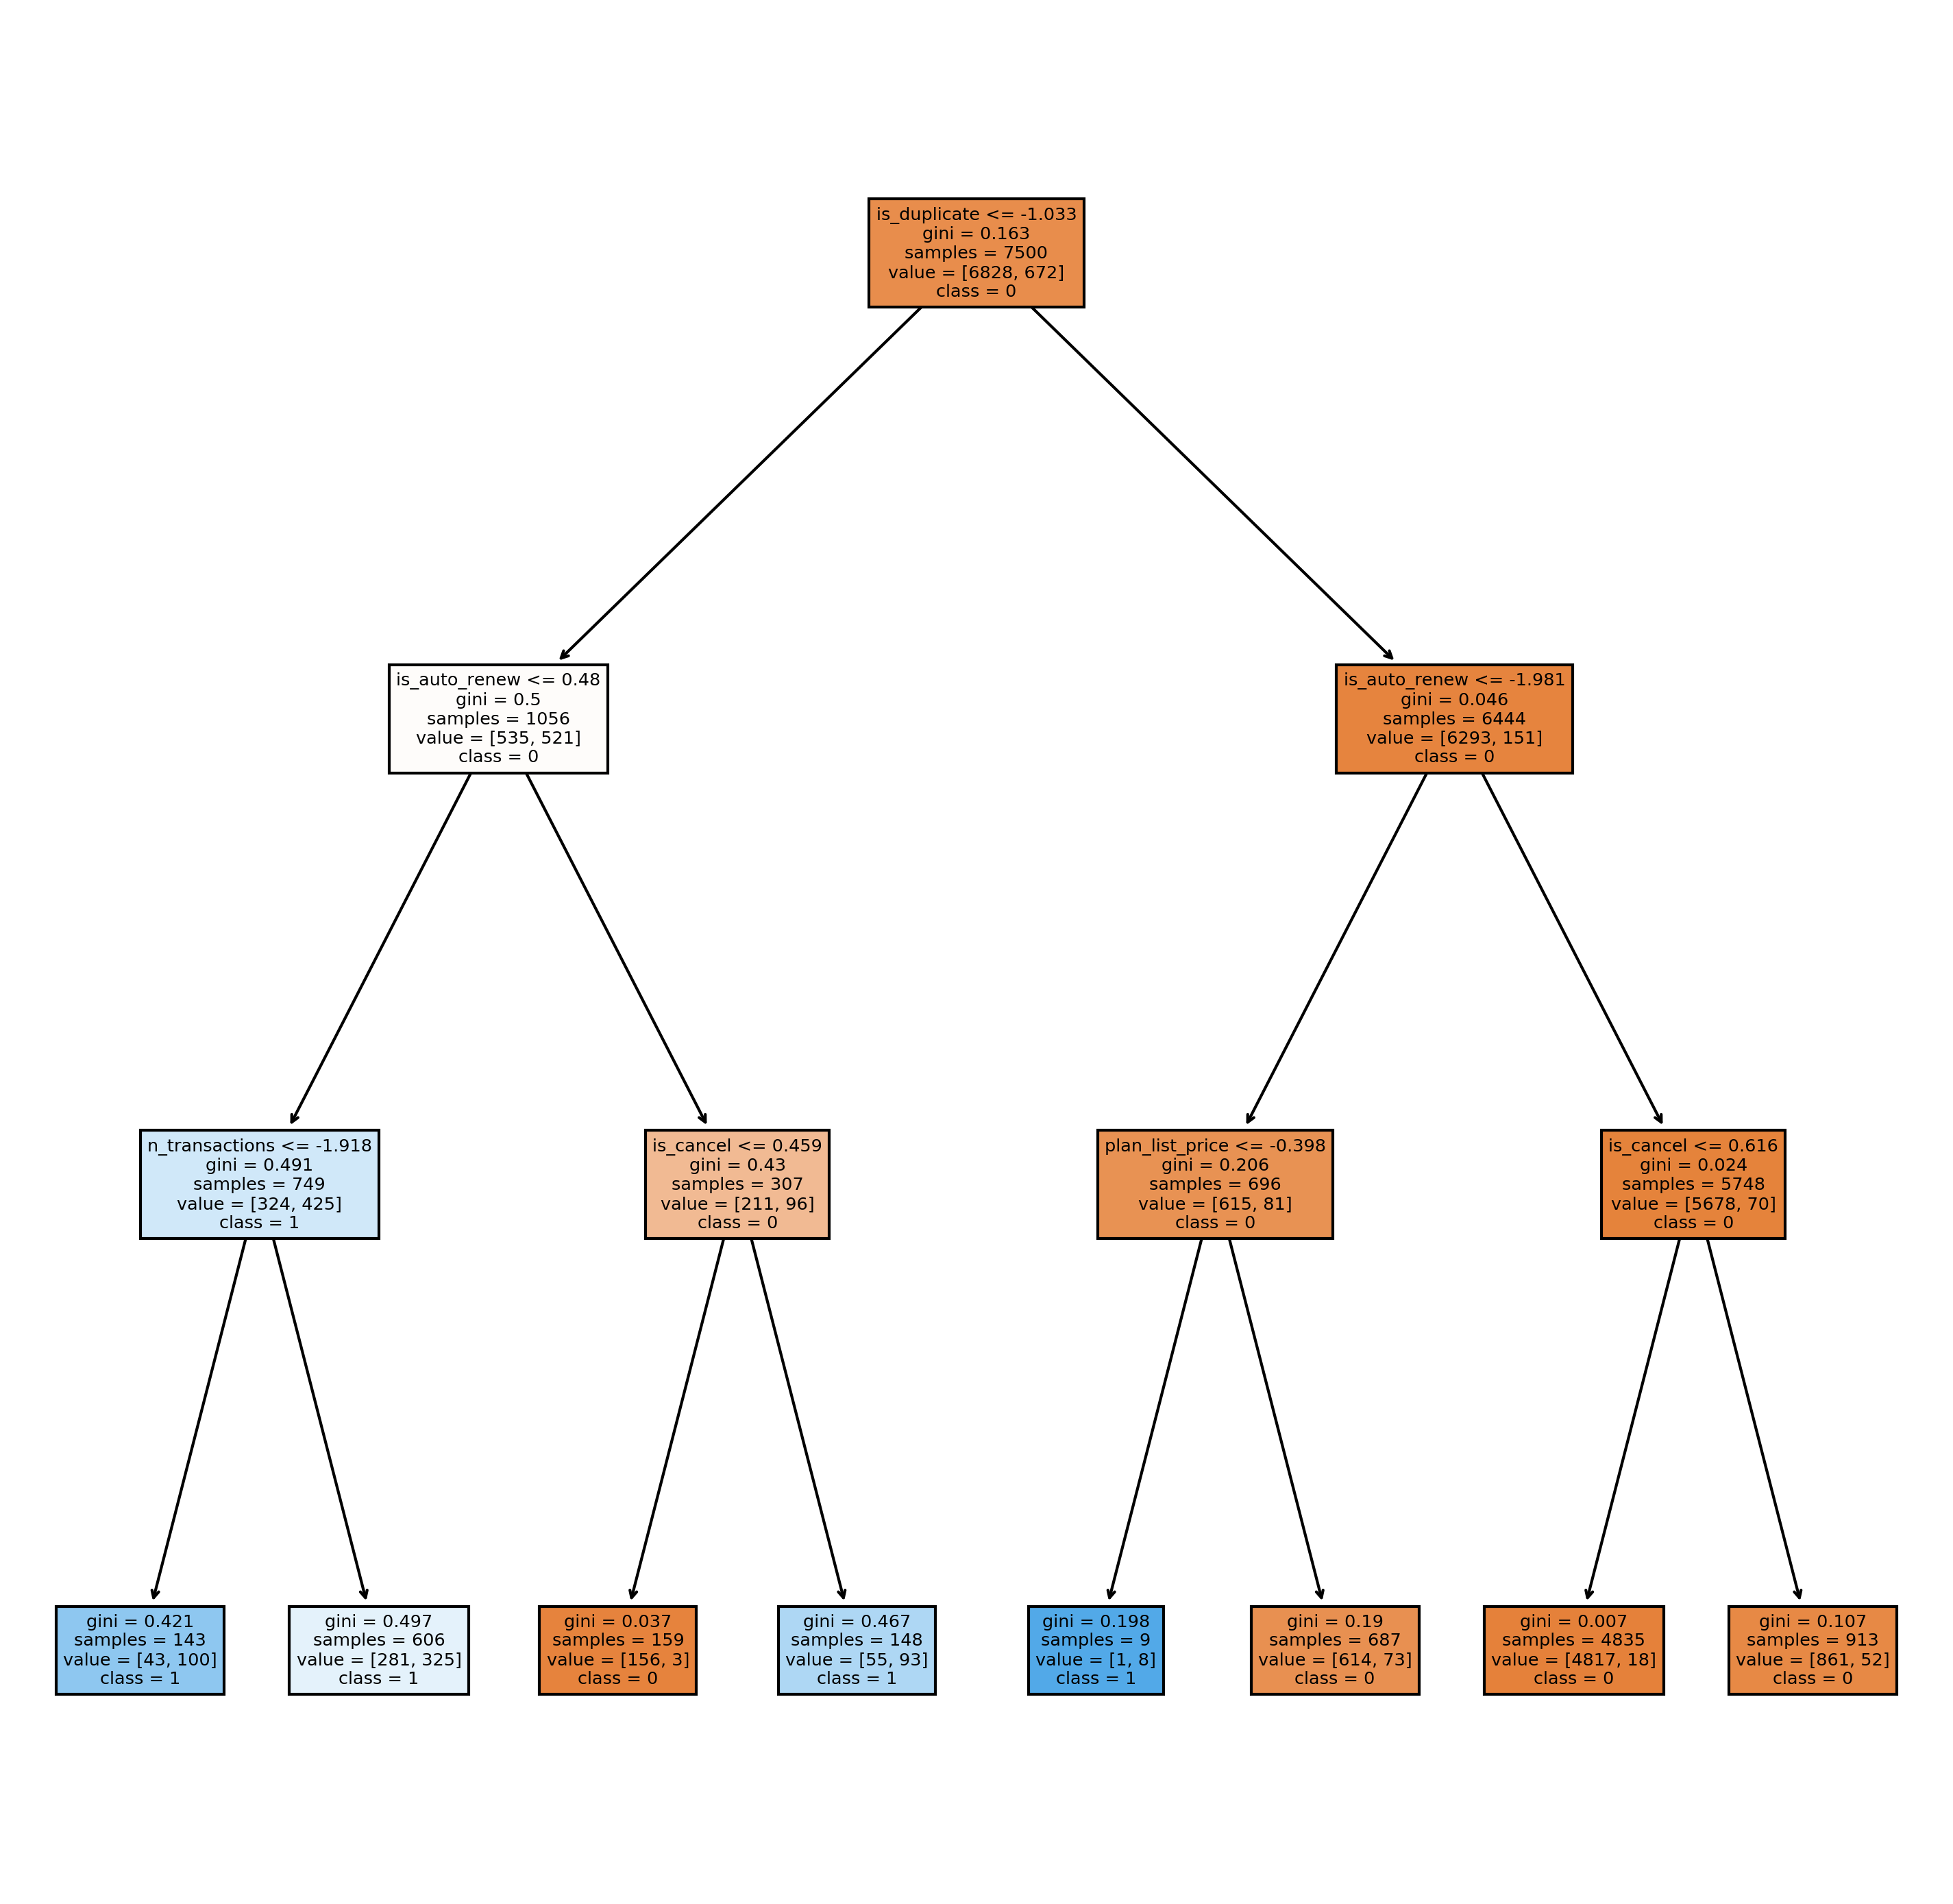

In [21]:
#Visualizing Decision Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(dt,
               feature_names = X.columns, 
               class_names=['0','1'],
               filled = True);

## Final Challenge
### Develop a model using a pipeline
I will attempt to create a model using a randomforest. The pipeline will be made of:
<br>- Scaling
<br>- Over-Sampling
<br>- GridSearch

In [67]:
# create inputs for pipeline
X= data.drop('is_churn', axis=1)
y=data['is_churn']
scaler= StandardScaler()
clf=RandomForestClassifier()
parameters= {'randomforestclassifier__max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000]}
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=69,stratify=y)

In [68]:
from imblearn.pipeline import make_pipeline
pipeline=make_pipeline(scaler, SMOTE(sampling_strategy='minority'),clf)

In [71]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(pipeline, param_grid=parameters, verbose=2, cv=3)

In [72]:
cv.fit(X_train,y_train)

Fitting 3 folds for each of 55 candidates, totalling 165 fits
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200, total=   1.3s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200, total=   1.4s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200, total=   1.4s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=400, total=   2.6s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=400, total=   2.6s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=400, total=   3.2s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=600 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=600, 

[CV]  randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=200, total=   2.3s
[CV] randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=200, total=   2.4s
[CV] randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=400, total=   4.7s
[CV] randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=400, total=   4.7s
[CV] randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=400, total=   4.7s
[CV] randomforestclassifier__max_depth=30, randomforestclassifier__n_estimators=600 
[CV]  randomforestclassifier__max_depth=30, randomforestclassifier__n_estim

[CV]  randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=200, total=   2.3s
[CV] randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=200, total=   2.4s
[CV] randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=400, total=   4.7s
[CV] randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=400, total=   4.6s
[CV] randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=400, total=   4.6s
[CV] randomforestclassifier__max_depth=60, randomforestclassifier__n_estimators=600 
[CV]  randomforestclassifier__max_depth=60, randomforestclassifier__n_estim

[CV]  randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=200, total=   2.3s
[CV] randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=200, total=   2.4s
[CV] randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=400, total=   4.7s
[CV] randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=400, total=   4.5s
[CV] randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=400 
[CV]  randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=400, total=   4.6s
[CV] randomforestclassifier__max_depth=90, randomforestclassifier__n_estimators=600 
[CV]  randomforestclassifier__max_depth=90, randomforestclassifier__n_estim

[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed: 18.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='minority')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',


In [77]:
y_pred=cv.predict(X_test)
print("The best parameters are: ",cv.best_params_)
print('////////////////////////////////////////////////')
print("Accuracy: ", "{0:.2%}".format(cv.score(X_test,y_test)))
print('////////////////////////////////////////////////')
print('Confusion Matrix')
print(confusion_matrix(y_pred,y_test))
print('////////////////////////////////////////////////')
print(classification_report(y_pred,y_test))

The best parameters are:  {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__n_estimators': 200}
////////////////////////////////////////////////
Accuracy:  92.28%
////////////////////////////////////////////////
Confusion Matrix
[[2155   72]
 [ 121  152]]
////////////////////////////////////////////////
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2227
           1       0.68      0.56      0.61       273

    accuracy                           0.92      2500
   macro avg       0.81      0.76      0.78      2500
weighted avg       0.92      0.92      0.92      2500

